In [1]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath("../src"))

In [2]:
from proteome_tools import scrape_dataset,calibrate_to_iRT,preprocess_dataframe,process_files_parallel

# Collect proteome tools dataset

In [4]:
LINK_DATASET = "https://ftp.pride.ebi.ac.uk/pride/data/archive/2017/02/PXD004732/"
scrape_dataset(LINK_DATASET,"../raw_data/proteome_tools/")

In [6]:
process_files_parallel("../raw_data/proteome_tools", chronologer='../raw_data/Chronologer.tsv',output="../raw_data/proteome.parquet")

processing done: Thermo_SRM_Pool_11_01_01_ETD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_10_01_01_ETD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_12_01_01_3xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_12_01_01_2xIT_2xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_11_01_01_3xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_11_01_01_2xIT_2xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_12_01_01_ETD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_10_01_01_3xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_11_01_01_DDA-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_13_01_01_ETD-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_10_01_01_DDA-1h-R2-tryptic_evidence.txt
processing done: Thermo_SRM_Pool_12_01_01_DDA-1h-R2-tryptic_evidence.txt
processing done: Thermo_

,modified_sequence,Retention time,pool,file,iRT
0,AAEGLGAGVEEEGDDGK,25.766,10,Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryp...,27.925905
1,AAGPGGGSLASSSVAK,15.396,10,Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryp...,-11.284843
2,AALSGANVLTLIEK,52.388,10,Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryp...,128.588251
3,AASNHASPNESAYDVK,18.051,10,Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryp...,-1.245833
4,AASNHASPNESAYDVK,18.062,10,Thermo_SRM_Pool_10_01_01_2xIT_2xHCD-1h-R2-tryp...,-1.204240
...,...,...,...,...,...
1698537,YPSSQLGEM(ox)SLEEHSQCECRPK,25.948,6,TUM_third_pool_6_01_01_ETD-1h-R1-tryptic_evide...,28.290380
1698538,YPSSQLGEMSLEEHSQCECRPK,29.789,6,TUM_third_pool_6_01_01_ETD-1h-R1-tryptic_evide...,43.494513
1698539,YTSFYGAYFEK,41.359,6,TUM_third_pool_6_01_01_ETD-1h-R1-tryptic_evide...,89.292954
1698540,YVGDSYDSSAK,19.437,6,TUM_third_pool_6_01_01_ETD-1h-R1-tryptic_evide...,2.517376


# Example retention time calibration

In [33]:
df = pd.read_csv("../raw_data/proteome_tools/TUM_second_pool_12_02_01_3xHCD-1h-R1-tryptic_evidence.txt", sep='\t')

In [35]:
df['pool'] = "example"
df['file'] = "example"
df = preprocess_dataframe(df)

In [37]:
chronologer = pd.read_csv("../raw_data/Chronologer.tsv", sep='\t')

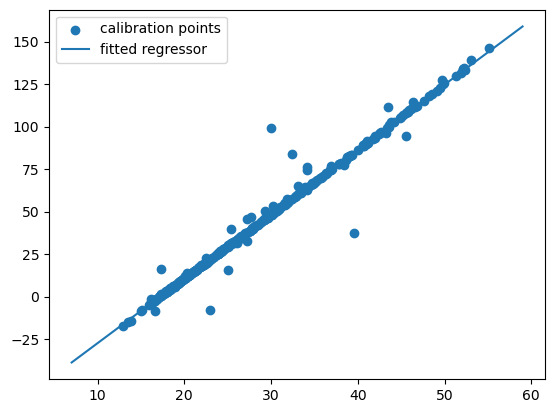

In [39]:
df = calibrate_to_iRT(df, chronologer,plot=True)